# Εισαγωγή του csv αρχείου και προεπεξεργασία των δεδομένων

In [3]:
import importcsv

print('Importing csv file...........')
small_dataset = importcsv.opencsv('processedspeech.csv') 

Importing csv file...........


#### Διαγραφή των γραμμών που μπορεί να έχουν έστω και ένα κελί NaN (Να μπεί στο data_processing)

In [4]:
small_dataset = small_dataset.dropna()

#### Αλλαγή των ονομάτων των κομμάτων σε πιο διακριτά ονόματα για να μπορούν να βρεθούν και να μη συγχέονται (Να μπει στο data_processing)

In [8]:
import wordtools

small_dataset['processed_speeches'] = wordtools.change_party_names(small_dataset)

#### Δημιουργία νέας στήλης με τα έτη.

In [9]:
from datetime import datetime
def extr_year(date):
    dateobjext = datetime.strptime(date, '%d/%m/%Y')
    return dateobjext.year

In [10]:
small_dataset['year'] = small_dataset['sitting_date'].apply(extr_year)

#### Εξαγωγή των ονομάτων των μελών του κοινοβουλίου

In [11]:
parliament_members = small_dataset['member_name'].unique()

In [12]:
len(parliament_members)

1381

#### Εξαγωγή των ονομάτων των παρατάξεων

In [8]:
pol_parties = small_dataset['political_party'].unique()

In [9]:
pol_parties

array(['πανελληνιο σοσιαλιστικο κινημα', 'νεα δημοκρατια',
       'συνασπισμος της αριστερας των κινηματων και της οικολογιας',
       'δημοκρατικη ανανεωση',
       'οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων εναλλακτικων οργανωσεων)',
       'ανεξαρτητοι (εκτος κομματος)', 'κομμουνιστικο κομμα ελλαδας',
       'πολιτικη ανοιξη', 'δημοκρατικο κοινωνικο κινημα',
       'συνασπισμος ριζοσπαστικης αριστερας',
       'λαικος ορθοδοξος συναγερμος', 'δημοκρατικη αριστερα',
       'ανεξαρτητοι ελληνες - πανος καμμενος',
       'λαικος συνδεσμος - χρυση αυγη',
       'ανεξαρτητοι δημοκρατικοι βουλευτες', 'το ποταμι',
       'ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια',
       'λαικη ενοτητα',
       'δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)',
       'ενωση κεντρωων', 'κινημα αλλαγης',
       'ελληνικη λυση - κυριακος βελοπουλος',
       'μετωπο ευρωπαικης ρεαλιστικης ανυπακοης (μερα25)'], dtype=object)

#### Εξαγωγή διαστήματος των ομιλιών

In [13]:
dates = small_dataset['year'].unique()

In [11]:
dates

array([1989, 1990, 1991, 1992, 1993, 1994, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

# 1ος Τρόπος: Υπολογισμος keywords μόνο από τη συχνοτήτα των λέξεων

custom_dataframe(dataframe, party = None, year = None, member = None, topk = 40)

In [14]:
import word_frequency_calculator

frequency_data = word_frequency_calculator.custom_dataframe_freq(small_dataset, party = 'κομμουνιστικο κομμα ελλαδας', year = 2020)

frequency_data

,words,frequency
0,ΕΡΓΑΖΟΜΕΝ,1491
1,ΛΑ,841
2,ΜΕΤΡ,813
3,ΣΥΡΙΖΑ,750
4,ΕΝΩΣ,686
5,ΥΓΕΙ,650
6,ΕΡΓΑΣΙ,571
7,ΑΝΑΓΚ,565
8,ΝΟΜΟΣΧΕΔΙ,558
9,ΝΔ,534


## Τα keywords για καποια παράταξη σε όλα τα χρόνια

       words  frequency
0        ΝΟΜ        388
1  ΕΡΓΑΖΟΜΕΝ        353
2  ΝΟΜΟΣΧΕΔΙ        349
3     ΠΡΟΤΑΣ        284
4        ΦΟΡ        269
       words  frequency
0  ΕΡΓΑΖΟΜΕΝ       1052
1        ΦΟΡ        883
2  ΝΟΜΟΣΧΕΔΙ        880
3     ΠΡΟΤΑΣ        771
4         ΛΑ        647
       words  frequency
0  ΕΡΓΑΖΟΜΕΝ        725
1  ΝΟΜΟΣΧΕΔΙ        627
2        ΦΟΡ        623
3      ΠΑΣΟΚ        618
4    ΠΡΟΒΛΗΜ        556
       words  frequency
0         ΝΔ        690
1  ΝΟΜΟΣΧΕΔΙ        648
2      ΠΑΣΟΚ        610
3      ΖΗΤΗΜ        586
4  ΕΡΓΑΖΟΜΕΝ        521
       words  frequency
0      ΑΓΡΟΤ        279
1         ΛΑ        239
2       ΕΝΩΣ        199
3        ΦΟΡ        150
4  ΕΡΓΑΖΟΜΕΝ        149
       words  frequency
0  ΝΟΜΟΣΧΕΔΙ       1172
1  ΕΡΓΑΖΟΜΕΝ        983
2        ΦΟΡ        862
3        ΝΟΜ        748
4         ΛΑ        736
       words  frequency
0  ΕΡΓΑΖΟΜΕΝ        543
1         ΛΑ        528
2        ΝΟΜ        330
3       ΕΝΩΣ        329
4   ΚΟΙΝΩΝΙΚ    

c:\Users\KoEle\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


       words  frequency
0  ΕΡΓΑΖΟΜΕΝ       1454
1         ΛΑ       1219
2       ΕΝΩΣ        833
3       ΜΕΤΡ        722
4    ΚΕΦΑΛΑΙ        669
       words  frequency
0  ΕΡΓΑΖΟΜΕΝ       1667
1         ΛΑ       1335
2       ΕΝΩΣ       1051
3      ΑΝΑΓΚ        906
4    ΚΕΦΑΛΑΙ        868
         words  frequency
0    ΕΡΓΑΖΟΜΕΝ       1226
1         ΕΝΩΣ       1175
2           ΛΑ        984
3        ΑΝΑΓΚ        764
4  ευρωπαϊκησ        667
       words  frequency
0         ΛΑ       1252
1  ΕΡΓΑΖΟΜΕΝ        893
2       ΕΝΩΣ        874
3       ΜΕΤΡ        725
4    ΚΕΦΑΛΑΙ        580
       words  frequency
0  ΕΡΓΑΖΟΜΕΝ       1571
1         ΛΑ       1406
2       ΕΝΩΣ       1104
3    ΚΕΦΑΛΑΙ       1024
4      ΑΝΑΓΚ        991
       words  frequency
0  ΕΡΓΑΖΟΜΕΝ       1329
1         ΛΑ        917
2      ΑΝΑΓΚ        668
3       ΕΝΩΣ        610
4     ΕΡΓΑΣΙ        601
       words  frequency
0  ΕΡΓΑΖΟΜΕΝ       1272
1         ΛΑ        810
2      ΑΝΑΓΚ        691
3       ΕΝΩΣ        636
4   

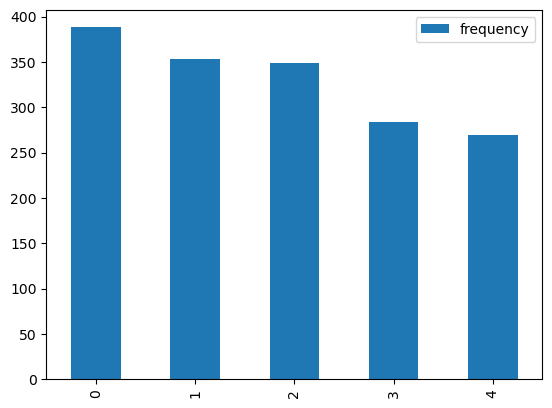

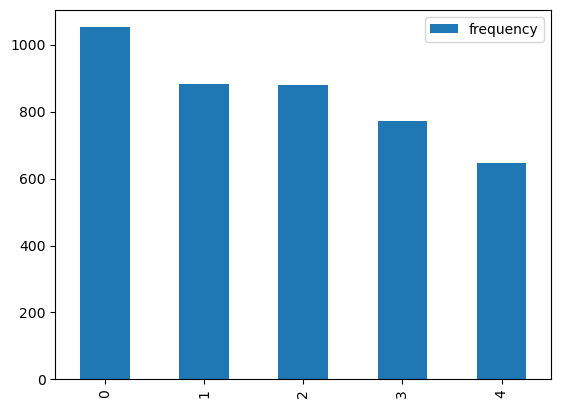

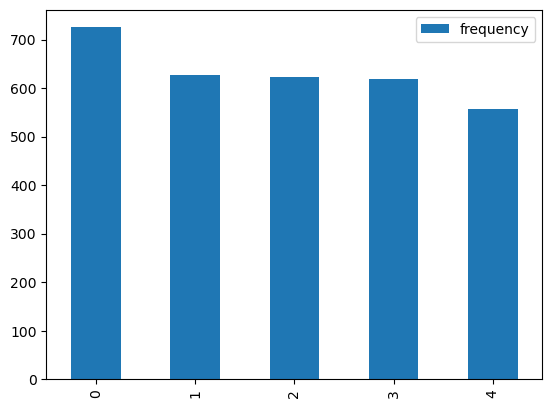

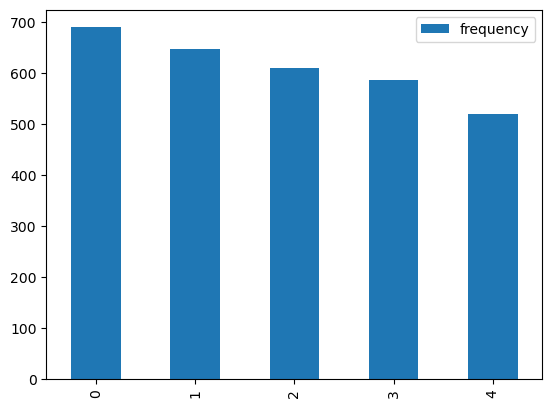

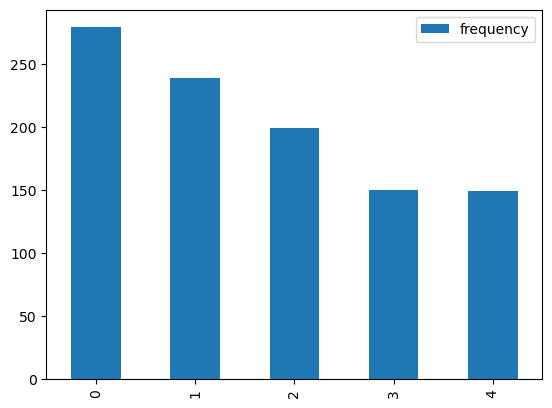

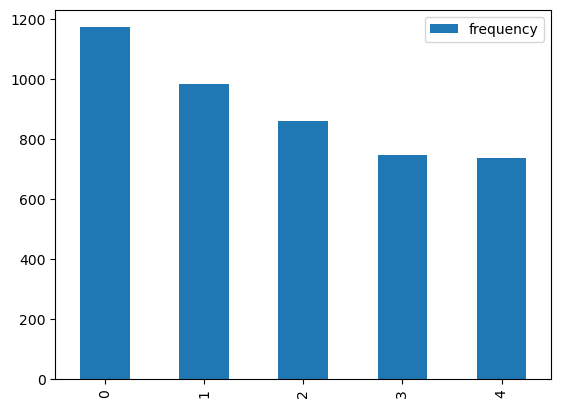

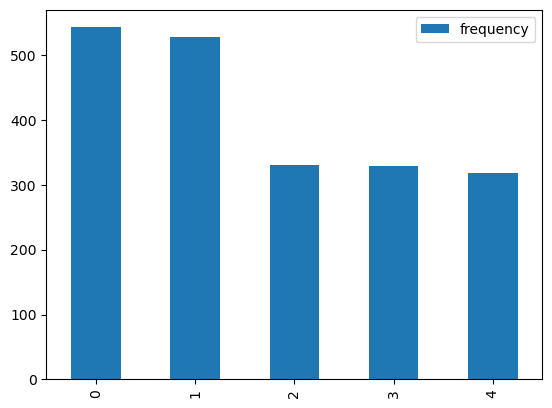

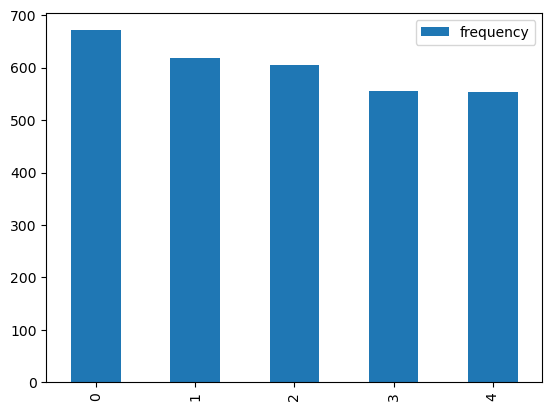

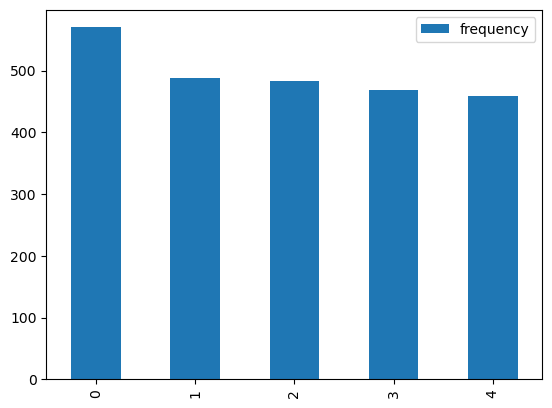

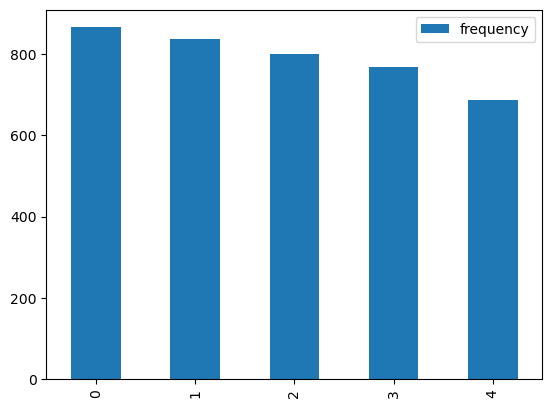

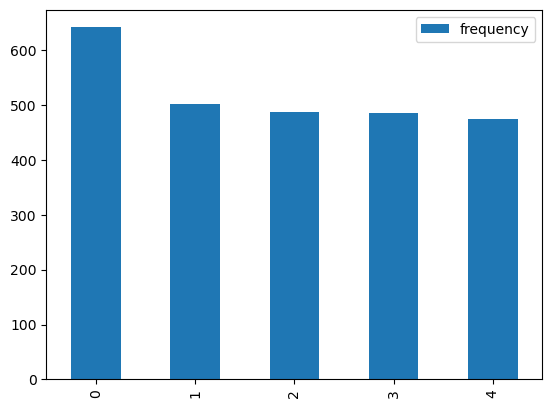

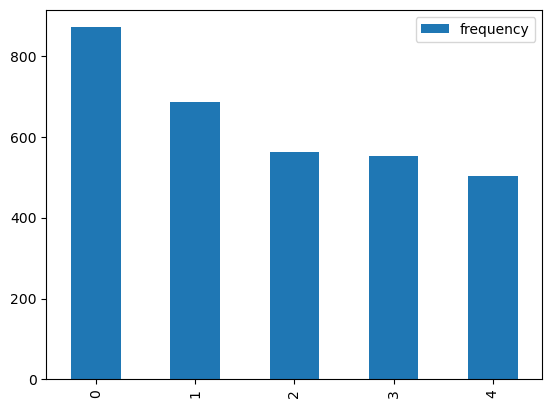

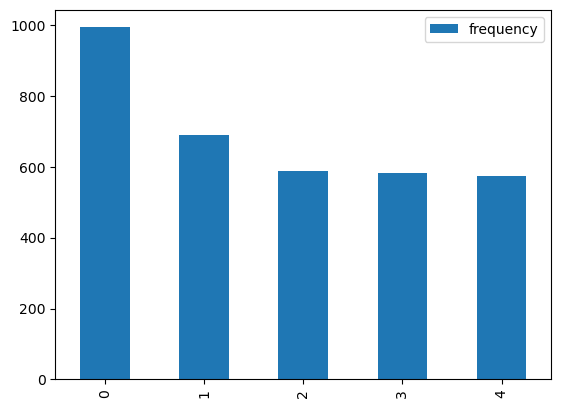

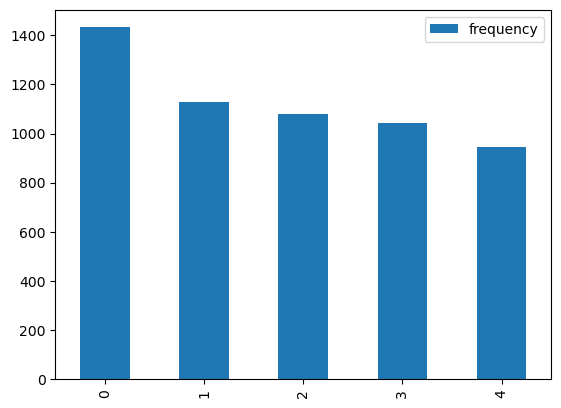

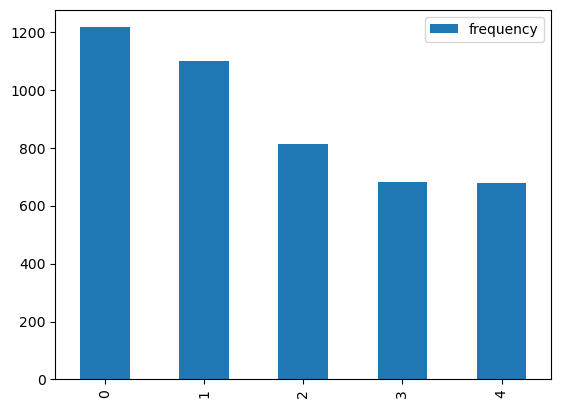

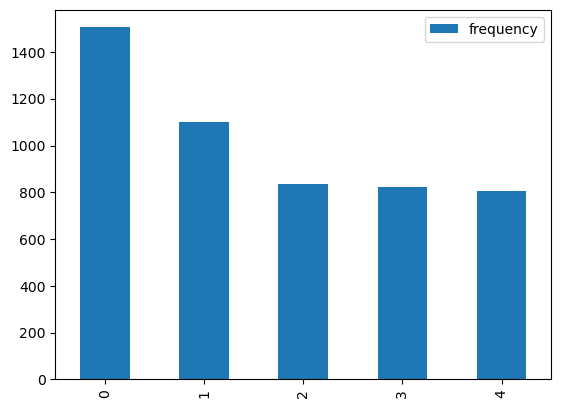

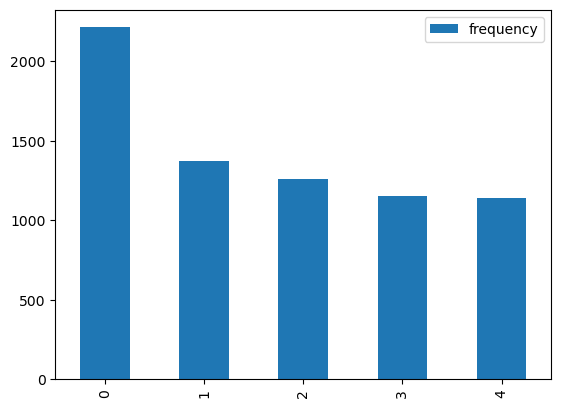

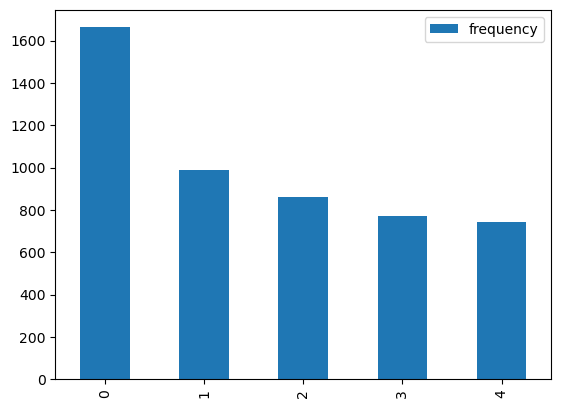

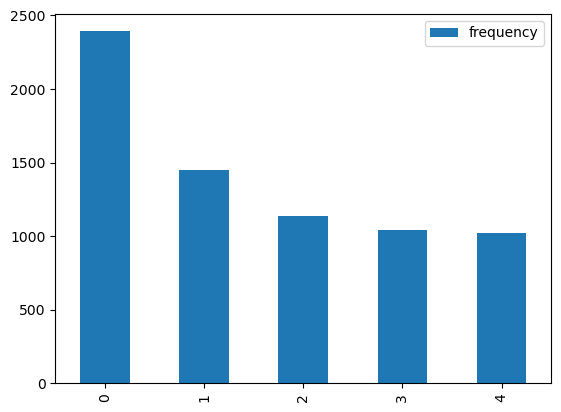

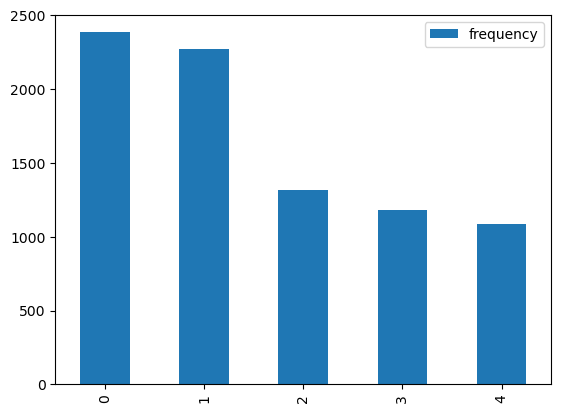

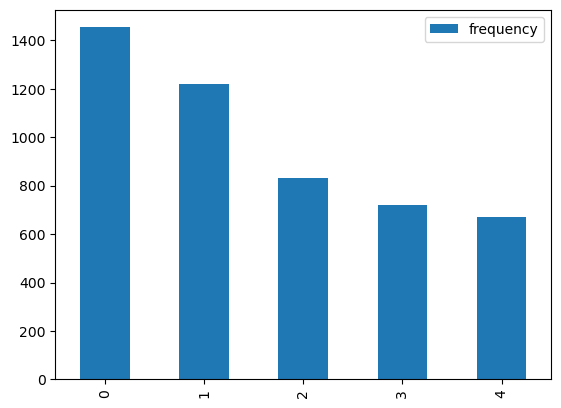

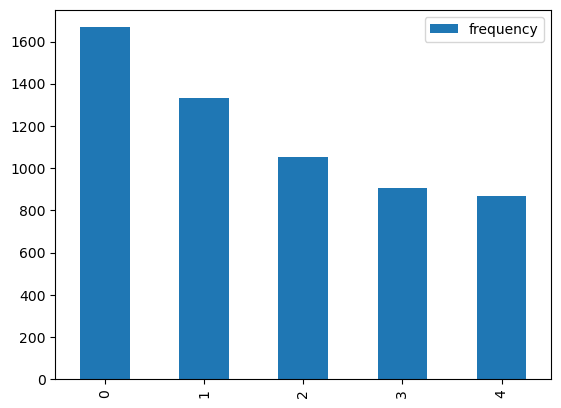

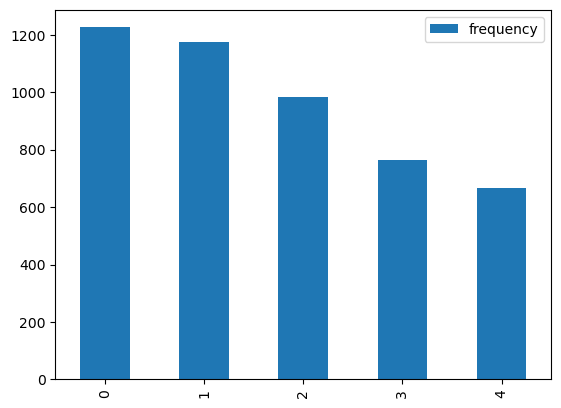

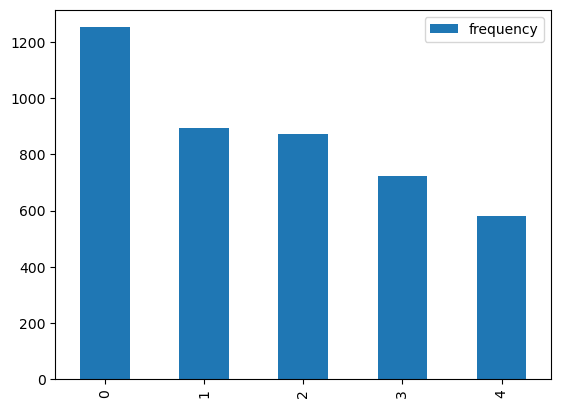

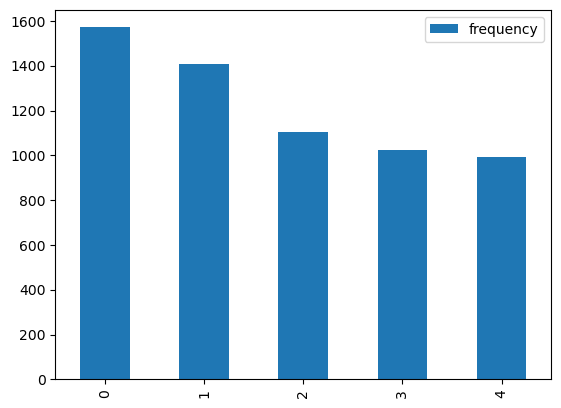

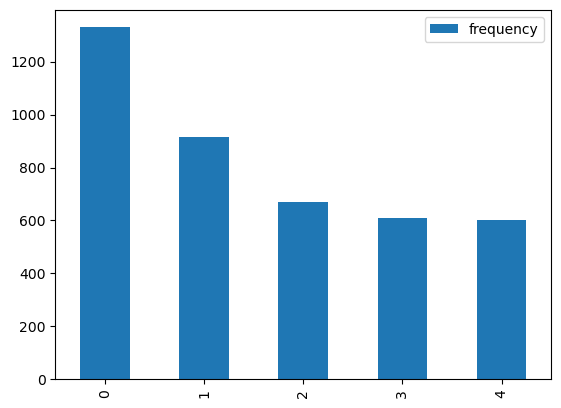

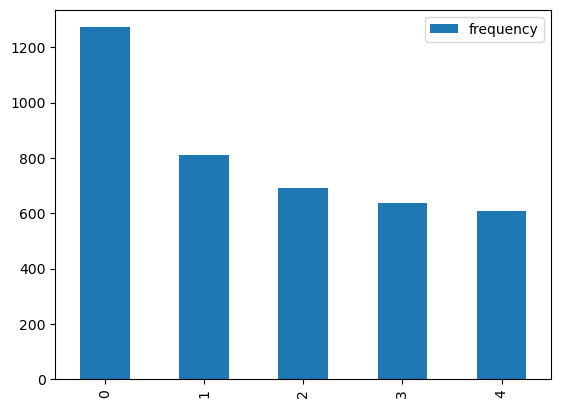

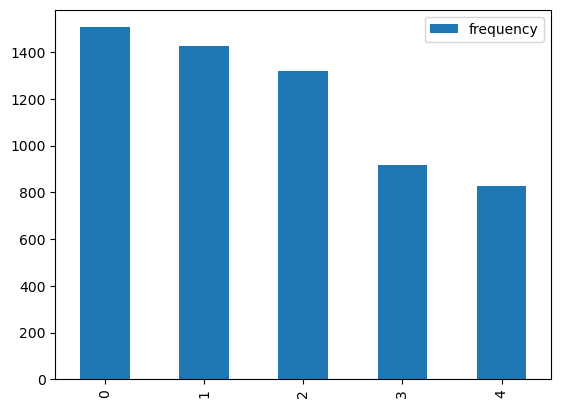

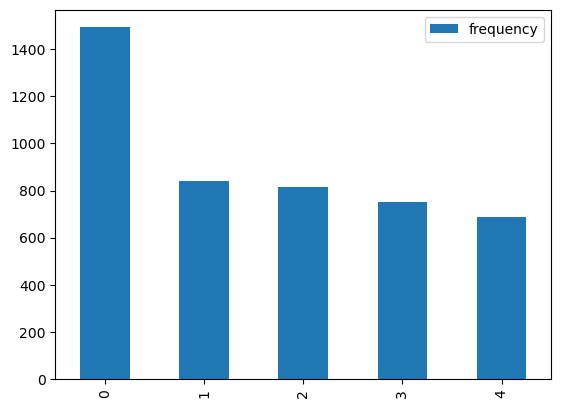

In [13]:

for year in dates:
   frequency_data = word_frequency_calculator.custom_dataframe_freq(small_dataset, party = 'κομμουνιστικο κομμα ελλαδας', year = year, topk = 5)
   if not frequency_data.empty:
      frequency_data.plot.bar()
      print(frequency_data)


# 2ος Τρόπος Υπολογισμός των keywords με το TfidfVectorizer 

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
import pandas as pd

dataframes_year = []
not_empty_years = []
for year in dates:
    filterd_dataframe = word_frequency_calculator.filter_dataframe(small_dataset, party = 'κομμουνιστικο κομμα ελλαδας', year = year)
    if not filterd_dataframe.empty:
        not_empty_years.append(year)

        tfidf_vectorizer = TfidfVectorizer()
        tfidf_matrix = tfidf_vectorizer.fit_transform(filterd_dataframe)
        words = tfidf_vectorizer.get_feature_names_out()
        words_dataframe = pd.DataFrame(data = tfidf_matrix.toarray(), columns = words)

        words_to_remove = [word.lower() for word in word_frequency_calculator.irrelevant_words if word.lower() in words_dataframe.columns]
        dataframes_year.append(words_dataframe.drop(columns = words_to_remove, axis=0))

In [16]:
dataframes_year[0].apply(lambda x: sum(x)).nlargest(10)

προτας       9.518818
νομ          8.732355
νομοσχεδι    7.862607
εργαζομεν    7.343482
δυνατοτητ    5.830470
γνωμ         5.767655
τιμ          5.749468
προβλημ      5.742767
φορ          5.731925
προβληματ    5.492655
dtype: float64

In [17]:
for year, keywords in zip(not_empty_years, dataframes_year):
    print(year)
    print(keywords.apply(lambda x: sum(x)).nlargest(10))

1991
προτας       9.518818
νομ          8.732355
νομοσχεδι    7.862607
εργαζομεν    7.343482
δυνατοτητ    5.830470
γνωμ         5.767655
τιμ          5.749468
προβλημ      5.742767
φορ          5.731925
προβληματ    5.492655
dtype: float64
1992
νομοσχεδι    24.091784
εργαζομεν    21.596235
προτας       19.078623
φορ          18.463877
νομ          14.107785
προβλημ      14.044704
κοινωνικ     14.040127
εθνικ        14.007701
δυνατοτητ    13.906816
λα           13.856531
dtype: float64
1993
νομοσχεδι    19.340660
εργαζομεν    16.919333
πασοκ        15.848860
προβλημ      15.147049
φορ          14.423371
νδ           13.949389
προτας       13.317451
νομ          12.669585
προβληματ    11.783211
λα           11.377732
dtype: float64
1994
νομοσχεδι    18.297425
νδ           16.436640
ζητημ        15.048322
πασοκ        14.697181
εργαζομεν    14.414439
νομ          12.828365
φορ          12.614159
ζητηματ      12.514674
προβλημ      12.360327
επιχειρης    11.995916
dtype: float64
1996
αγροτ

# 3oς Τρόπος με k-core decomposition με NetworkX library

#### Εφαρμογή μόνο για 100 speeches

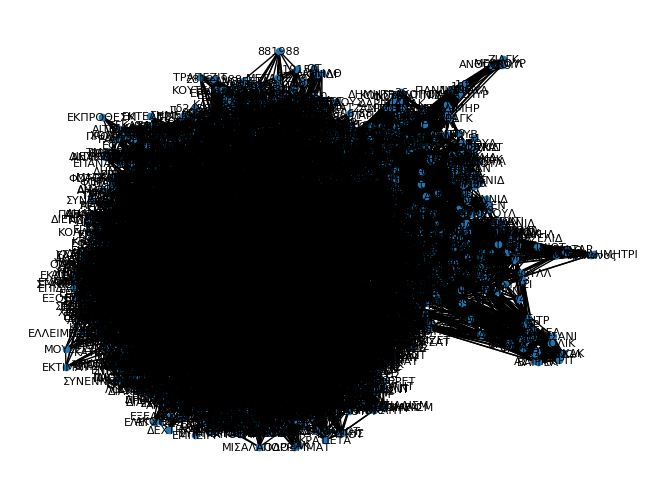

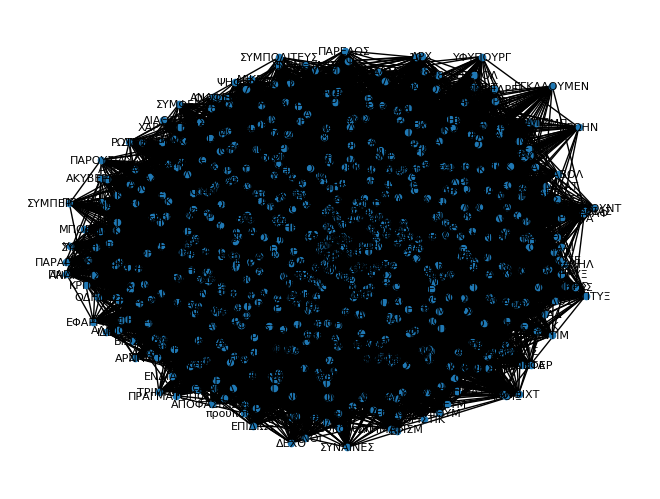

<class 'networkx.classes.graph.Graph'>
659
5323
['ΠΑΣΟΚ', 'ΝΔ', 'ΛΑ', 'ΚΑΘΑΡΣ', 'ΕΚΛΟΓ', 'ΕΘΝΙΚ', 'ΣΥΝΑΣΠΙΣΜ', 'ΤΖΑΝΝΕΤΑΚ', 'ΠΡΩΘΥΠΟΥΡΓ', 'ΔΥΝΑΤ', 'ΔΗΜΟΚΡΑΤΙ', 'ΦΑΚΕΛ']


In [15]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations


def create_word_graph(speeches):
    G = nx.Graph()

    for speech in speeches:
        words = speech.split()
        G.add_nodes_from(words)
        
        for word in words:
            neighbors = words[max(0, words.index(word) - 5):words.index(word)] + words[words.index(word) + 1:words.index(word) + 6]
            G.add_edges_from(combinations([word] + neighbors, 2))
    G.remove_edges_from(nx.selfloop_edges(G))
    return G

def plot_word_graph(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, font_size=8, node_size=20, font_color='black')
    plt.show()

def k_core_decomposition(graph):
    
    k_cores = nx.k_core(graph, k=50)
    return k_cores

def extract_top_words(graph, top_n):
    degrees = dict(graph.degree())
    sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
    top_words = [word for word, degree in sorted_degrees[:top_n] if word not in word_frequency_calculator.irrelevant_words]
    return top_words


# Εφαρμογή μόνο για 100 speeches
listofspeeched = small_dataset['processed_speeches'].iloc[0:100]
word_graph = create_word_graph(listofspeeched)


plot_word_graph(word_graph) # original data graph


k_core_result = k_core_decomposition(word_graph) # k-core decomposition
plot_word_graph(k_core_result) # final data graph
print(type(k_core_result))
print(len(k_core_result))
print(len(word_graph))
print(extract_top_words(k_core_result, top_n=40))

#### spript k_decomposition που επιστρέφει τα keywords No Plot

Με αυτό το setup (μια παράταξη με πολλά speeches για ένα έτος) ~ 1 ώρα

In [16]:
from k_decomposition import getkeywords
party = 'κομμουνιστικο κομμα ελλαδας'
year = 2020

filterd_dataframe = word_frequency_calculator.filter_dataframe(small_dataset, party = party, year = year)

print(getkeywords(filterd_dataframe))


Creating graph of original data....
Decomposition.....
['ΕΡΓΑΖΟΜΕΝ', 'ΛΑ', 'ΣΥΡΙΖΑ', 'ΜΕΤΡ', 'ΕΝΩΣ', 'ΝΔ', 'ΝΟΜΟΣΧΕΔΙ', 'ΑΝΑΓΚ', 'ΕΡΓΑΣΙ', 'ΝΟΜ', 'ΥΓΕΙ', 'ΦΟΡ', 'ΔΙΚΑΙΩΜΑΤ', 'ΒΑΣ', 'ΛΕΤ', 'ΠΡΟΣΤΑΣΙ', 'ΕΠΙΧΕΙΡΗΜΑΤΙΚ', 'ΟΜΙΛ', 'γι’', 'ΚΟΙΝΩΝΙΚ', 'ΕΥΘΥΝ', 'ευρωπαϊκησ', 'ΠΡΟΣΩΠΙΚ', 'ΚΚΕ', 'ΔΙΑΦΟΡ', 'ΑΝΘΡΩΠ', 'ΠΑΙΔΙ', 'ΚΡΑΤΙΚ', 'ΣΥΣΤΗΜ', 'ΚΕΦΑΛΑΙ', 'ΣΥΝΘΗΚ', 'ΕΠΙΧΕΙΡΗΣ', 'ΚΑΠΙΤΑΛΙΣΤΙΚ', 'ΣΧΕΔΙ', 'ΟΥΣΙΑΣΤΙΚ', 'ΟΙΚΟΝΟΜΙΚ', 'ΔΟΥΛΕΙ', 'ΑΠΟΤΕΛ', 'ευρωπαϊκη', 'ΠΑΡΑΔΕΙΓΜ', 'ΠΡΟΒΛΗΜΑΤ', 'ΛΕΙΤΟΥΡΓΙ', 'ΠΑΝΔΗΜΙ', 'ΕΥΡΩ', 'ΚΑΤΑΣΤΑΣ', 'ΔΥΝΑΤΟΤΗΤ', 'ΑΝΑΠΤΥΞ', 'ΚΑΜΜΙ', 'ΖΩ', 'ΤΕΛ', 'ΑΠΛ']
